In [1]:
#loading packages
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)
library(clustree)
library(tibble)
library(dittoSeq)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: ggraph



# Loading SCT normalised object

In [2]:
data.filt_sct <- readRDS("/home/uqkngu23/90days/software/hncancer_collab_analysis/de_outs/updated_annotations/data.filt_sct.RDS")

In [3]:
#removing spot labelled with N
data.filt_sct <- subset(data.filt_sct, tissues != "N")
table(data.filt_sct$tissues)


  A1   A2   A3   B1   B2   C1   C2   C3   C4   D1   D2 
1125 1505  931 1716 1764  742  766  964  880 1637 1581 

# Loading RDS of clustering results

In [4]:
all.integrated <- readRDS("/home/uqkngu23/90days/software/hncancer_collab_analysis/cluster_outs/50pca_all.integrated_by_tissue_v2.RDS")
head(all.integrated)

orig.ident    nCount_Spatial nFeature_Spatial cell_type
A_AAACAATCTACTAGCA-1 SeuratProject  7155          3520             stroma   
A_AAACAGAGCGACTCCT-1 SeuratProject  2622          1529             stroma   
A_AAACCACTACACAGAT-1 SeuratProject  5383          2912             stroma   
A_AAACGAAGAACATACC-1 SeuratProject  6063          2758             stroma   
A_AAACGACAGTCTTGCC-1 SeuratProject  9441          4272             stroma   
A_AAACGCCCGAGATCGG-1 SeuratProject  3286          1929             stroma   
A_AAACGGGTTGGTATCC-1 SeuratProject 13908          4131             tumour   
A_AAACGTGTTCGCCCTA-1 SeuratProject  3565          2113             stroma   
A_AAACTAACGTGGCGAC-1 SeuratProject  3832          2162             stroma   
A_AAAGACATGAAGTTTA-1 SeuratProject 15592          4453             stroma   
                     recurrent tissues sample_id      p16_status tissue_site
A_AAACAATCTACTAGCA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACAGAGCGACTCCT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACCACTACACAGAT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGAAGAACATACC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGACAGTCTTGCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGCCCGAGATCGG-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGGGTTGGTATCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGTGTTCGCCCTA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACTAACGTGGCGAC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAAGACATGAAGTTTA-1 N         A1      P9900_no_event negative   oropharynx 
                     slide nCount_SCT nFeature_SCT integrated_snn_res.0.1
A_AAACAATCTACTAGCA-1 A     7413       3520         1                     
A_AAACAGAGCGACTCCT-1 A     6568       1971         1                     
A_AAACCACTACACAGAT-1 A     6997       2912         0                     
A_AAACGAAGAACATACC-1 A     7144       2758         0                     
A_AAACGACAGTCTTGCC-1 A     8835       4272         0                     
A_AAACGCCCGAGATCGG-1 A     6978       2127         1                     
A_AAACGGGTTGGTATCC-1 A     8884       3719         2                     
A_AAACGTGTTCGCCCTA-1 A     7126       2267         1                     
A_AAACTAACGTGGCGAC-1 A     7331       2259         0                     
A_AAAGACATGAAGTTTA-1 A     8762       3479         2                     
                     seurat_clusters
A_AAACAATCTACTAGCA-1 1              
A_AAACAGAGCGACTCCT-1 1              
A_AAACCACTACACAGAT-1 0              
A_AAACGAAGAACATACC-1 0              
A_AAACGACAGTCTTGCC-1 0              
A_AAACGCCCGAGATCGG-1 1              
A_AAACGGGTTGGTATCC-1 2              
A_AAACGTGTTCGCCCTA-1 1              
A_AAACTAACGTGGCGAC-1 0              
A_AAAGACATGAAGTTTA-1 2

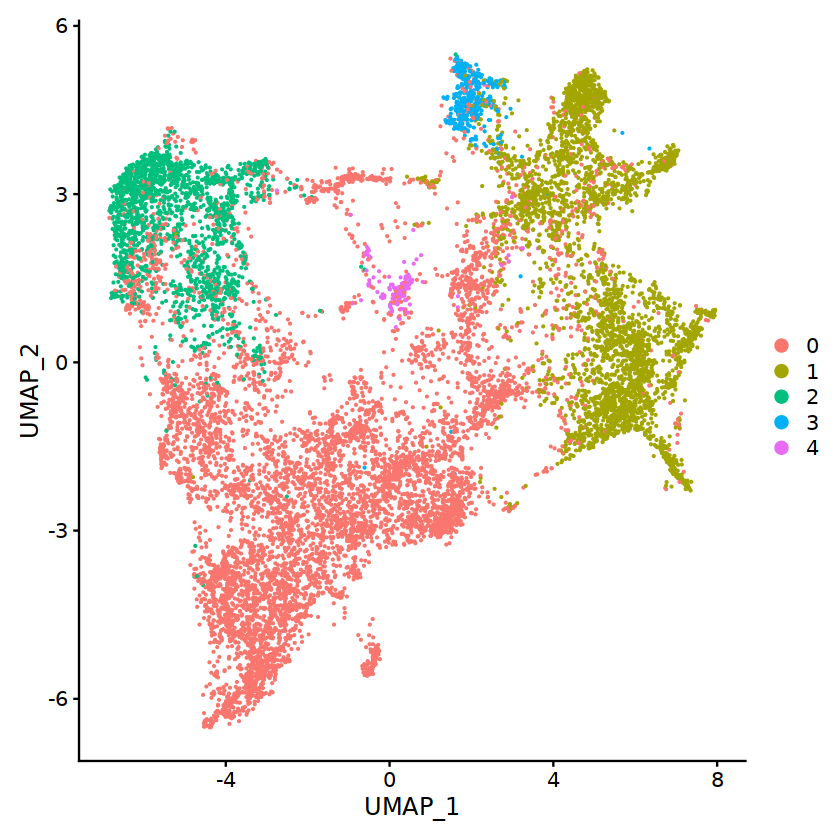

In [5]:
DimPlot(all.integrated)

In [5]:
##### FIND SUB CLUSTER ######
Idents(all.integrated) <- "seurat_clusters"
all.integrated <- FindSubCluster(all.integrated, cluster = "1", graph.name = "integrated_nn", resolution = 0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3739
Number of edges: 33162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 10
Elapsed time: 0 seconds


8 singletons identified. 2 final clusters.



In [6]:
?FindSubCluster()

In [22]:
table(all.integrated$sub.cluster)


   0  1_0  1_1    2    3    4 
7387 2073 1666 1906  412  167 

In [23]:
head(all.integrated)

orig.ident    nCount_Spatial nFeature_Spatial cell_type
A_AAACAATCTACTAGCA-1 SeuratProject  7155          3520             stroma   
A_AAACAGAGCGACTCCT-1 SeuratProject  2622          1529             stroma   
A_AAACCACTACACAGAT-1 SeuratProject  5383          2912             stroma   
A_AAACGAAGAACATACC-1 SeuratProject  6063          2758             stroma   
A_AAACGACAGTCTTGCC-1 SeuratProject  9441          4272             stroma   
A_AAACGCCCGAGATCGG-1 SeuratProject  3286          1929             stroma   
A_AAACGGGTTGGTATCC-1 SeuratProject 13908          4131             tumour   
A_AAACGTGTTCGCCCTA-1 SeuratProject  3565          2113             stroma   
A_AAACTAACGTGGCGAC-1 SeuratProject  3832          2162             stroma   
A_AAAGACATGAAGTTTA-1 SeuratProject 15592          4453             stroma   
                     recurrent tissues sample_id      p16_status tissue_site
A_AAACAATCTACTAGCA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACAGAGCGACTCCT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACCACTACACAGAT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGAAGAACATACC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGACAGTCTTGCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGCCCGAGATCGG-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGGGTTGGTATCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGTGTTCGCCCTA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACTAACGTGGCGAC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAAGACATGAAGTTTA-1 N         A1      P9900_no_event negative   oropharynx 
                     slide nCount_SCT nFeature_SCT integrated_snn_res.0.1
A_AAACAATCTACTAGCA-1 A     7413       3520         1                     
A_AAACAGAGCGACTCCT-1 A     6568       1971         1                     
A_AAACCACTACACAGAT-1 A     6997       2912         0                     
A_AAACGAAGAACATACC-1 A     7144       2758         0                     
A_AAACGACAGTCTTGCC-1 A     8835       4272         0                     
A_AAACGCCCGAGATCGG-1 A     6978       2127         1                     
A_AAACGGGTTGGTATCC-1 A     8884       3719         2                     
A_AAACGTGTTCGCCCTA-1 A     7126       2267         1                     
A_AAACTAACGTGGCGAC-1 A     7331       2259         0                     
A_AAAGACATGAAGTTTA-1 A     8762       3479         2                     
                     seurat_clusters sub.cluster
A_AAACAATCTACTAGCA-1 1               1_0        
A_AAACAGAGCGACTCCT-1 1               1_1        
A_AAACCACTACACAGAT-1 0               0          
A_AAACGAAGAACATACC-1 0               0          
A_AAACGACAGTCTTGCC-1 0               0          
A_AAACGCCCGAGATCGG-1 1               1_1        
A_AAACGGGTTGGTATCC-1 2               2          
A_AAACGTGTTCGCCCTA-1 1               1_1        
A_AAACTAACGTGGCGAC-1 0               0          
A_AAAGACATGAAGTTTA-1 2               2

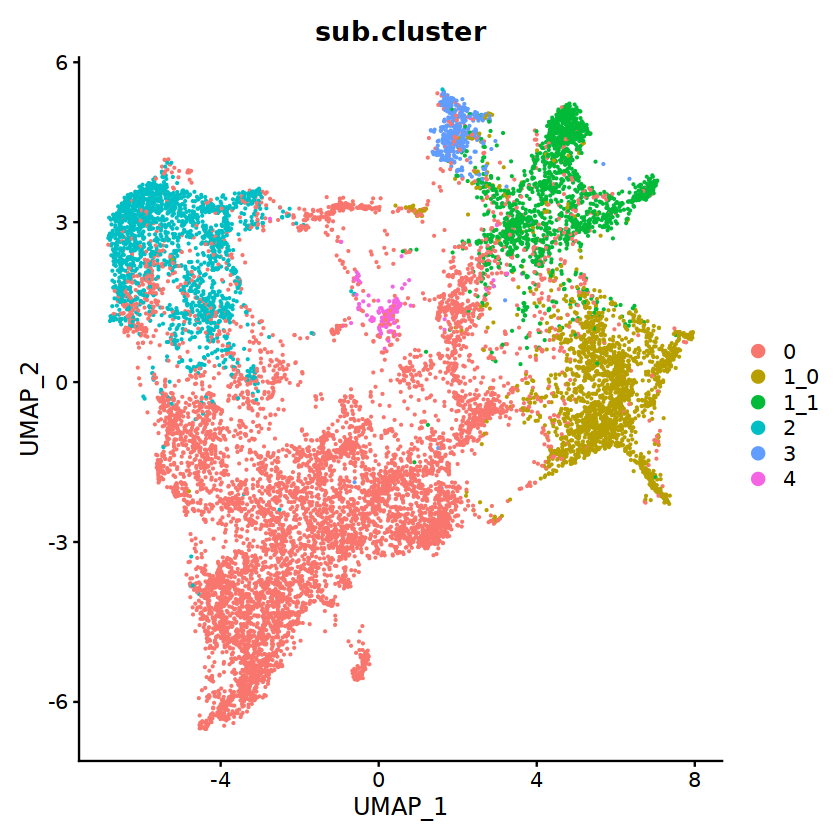

In [24]:
#with 2 subclusters res = 0.1
DimPlot(all.integrated, group.by = "sub.cluster")

# Saving .RDS

In [29]:
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis/cluster_outs/"
saveRDS(all.integrated, file = paste0(outdir, "50pca_all.integrated_by_tissue_subcluster1_res0.1.RDS"))

In [6]:
library(RColorBrewer)

In [9]:
inte <- table(all.integrated$sub.cluster, all.integrated$recurrent)
inte <- as.data.frame(inte)
head(inte)

Var1 Var2 Freq
1 0    N    3542
2 1_0  N    1294
3 1_1  N    1125
4 2    N     766
5 3    N     396
6 4    N     130

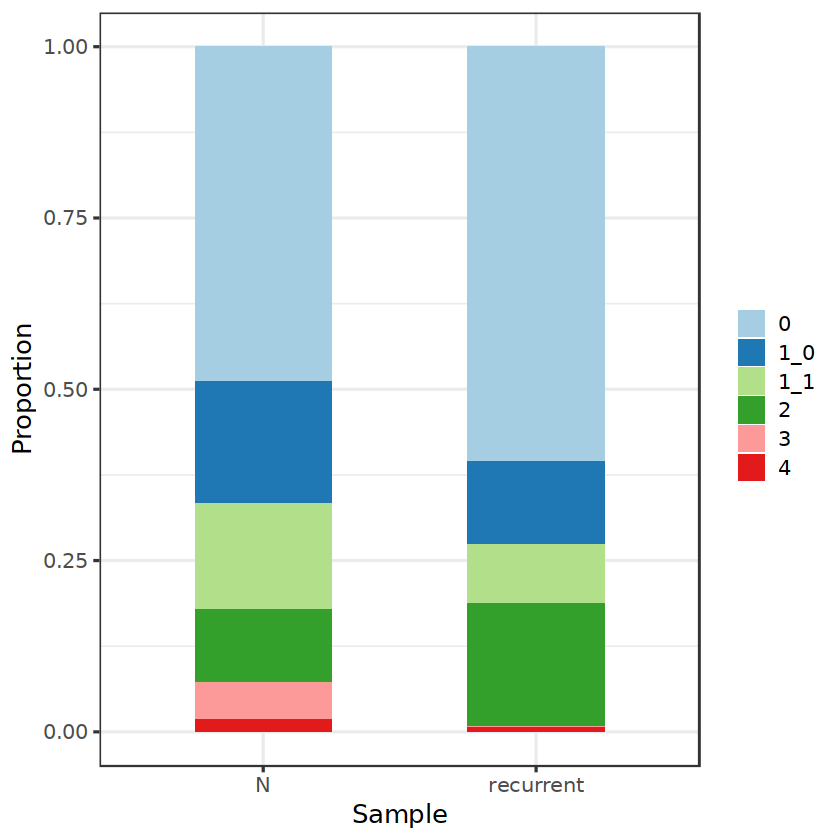

In [10]:
ggplot(inte, aes(x = Var2, y = Freq, fill = Var1)) +
  theme_bw(base_size = 15) +
  geom_col(position = "fill", width = 0.5) +
  xlab("Sample") +
  ylab("Proportion") +
  scale_fill_manual(values = brewer.pal(12, "Paired")) +
  theme(legend.title = element_blank())

# Re-scaling images

In [11]:
# get cells
A11_cells <- names(which(data.filt_sct$tissues == "A1")) # & data.filt_sct2$cell_type == "tumour"))
A12_cells <- names(which(data.filt_sct$tissues == "A2")) # & data.filt_sct2$cell_type == "tumour"))
A13_cells <- names(which(data.filt_sct$tissues == "A3")) # & data.filt_sct2$cell_type == "tumour"))


# subset
A11 <- subset(data.filt_sct, cells = A11_cells)
A12 <- subset(data.filt_sct, cells = A12_cells)
A13 <- subset(data.filt_sct, cells = A13_cells)

# remove images
A11@images$slice1_B <- NULL
A11@images$slice1_C <- NULL
A11@images$slice1_D <- NULL

A12@images$slice1_B <- NULL
A12@images$slice1_C <- NULL
A12@images$slice1_D <- NULL

A13@images$slice1_B <- NULL
A13@images$slice1_C <- NULL
A13@images$slice1_D <- NULL

coord_A11 <- GetTissueCoordinates(object = A11)
coord_A12 <- GetTissueCoordinates(object = A12)
coord_A13 <- GetTissueCoordinates(object = A13)

ratio_A11 <- (max(coord_A11$imagerow) - min(coord_A11$imagerow)) / (max(coord_A11$imagecol) - min(coord_A11$imagecol))
ratio_A12 <- (max(coord_A12$imagerow) - min(coord_A12$imagerow)) / (max(coord_A12$imagecol) - min(coord_A12$imagecol))
ratio_A13 <- (max(coord_A13$imagerow) - min(coord_A13$imagerow)) / (max(coord_A13$imagecol) - min(coord_A13$imagecol))

In [12]:
# get cells
B11_cells <- names(which(data.filt_sct$tissues == "B1")) #& data.filt_sct$cell_type == "tumour"))
B12_cells <- names(which(data.filt_sct$tissues == "B2")) #& data.filt_sct$cell_type == "tumour"))

# subset
B11 <- subset(data.filt_sct, cells = B11_cells)
B12 <- subset(data.filt_sct, cells = B12_cells)

# remove images
B11@images$slice1 <- NULL
B11@images$slice1_C <- NULL
B11@images$slice1_D <- NULL

B12@images$slice1 <- NULL
B12@images$slice1_C <- NULL
B12@images$slice1_D <- NULL

# Calculating ratios
coord_B11 <- GetTissueCoordinates(object = B11)
coord_B12 <- GetTissueCoordinates(object = B12)

ratio_B11 <- (max(coord_B11$imagerow) - min(coord_B11$imagerow)) / (max(coord_B11$imagecol) - min(coord_B11$imagecol))
ratio_B12 <- (max(coord_B12$imagerow) - min(coord_B12$imagerow)) / (max(coord_B12$imagecol) - min(coord_B12$imagecol))

In [13]:
# get cells
C11_cells <- names(which(data.filt_sct$tissues == "C1")) #& data.filt_sct$cell_type == "tumour"))
C12_cells <- names(which(data.filt_sct$tissues == "C2")) #& data.filt_sct$cell_type == "tumour"))
C13_cells <- names(which(data.filt_sct$tissues == "C3")) #& data.filt_sct$cell_type == "tumour"))
C14_cells <- names(which(data.filt_sct$tissues == "C4")) #& data.filt_sct$cell_type == "tumour"))

# subset
C11 <- subset(data.filt_sct, cells = C11_cells)
C12 <- subset(data.filt_sct, cells = C12_cells)
C13 <- subset(data.filt_sct, cells = C13_cells)
C14 <- subset(data.filt_sct, cells = C14_cells)

# remove images
C11@images$slice1 <- NULL
C11@images$slice1_B <- NULL
C11@images$slice1_D <- NULL

C12@images$slice1 <- NULL
C12@images$slice1_B <- NULL
C12@images$slice1_D <- NULL

C13@images$slice1 <- NULL
C13@images$slice1_B <- NULL
C13@images$slice1_D <- NULL

C14@images$slice1 <- NULL
C14@images$slice1_B <- NULL
C14@images$slice1_D <- NULL

# Calculating ratios
coord_C11 <- GetTissueCoordinates(object = C11)
coord_C12 <- GetTissueCoordinates(object = C12)
coord_C13 <- GetTissueCoordinates(object = C13)
coord_C14 <- GetTissueCoordinates(object = C14)

ratio_C11 <- (max(coord_C11$imagerow) - min(coord_C11$imagerow)) / (max(coord_C11$imagecol) - min(coord_C11$imagecol))
ratio_C12 <- (max(coord_C12$imagerow) - min(coord_C12$imagerow)) / (max(coord_C12$imagecol) - min(coord_C12$imagecol))
ratio_C13 <- (max(coord_C13$imagerow) - min(coord_C13$imagerow)) / (max(coord_C13$imagecol) - min(coord_C13$imagecol))
ratio_C14 <- (max(coord_C14$imagerow) - min(coord_C14$imagerow)) / (max(coord_C14$imagecol) - min(coord_C14$imagecol))

In [14]:
# get cells
D11_cells <- names(which(data.filt_sct$tissues == "D1")) #& data.filt_sct$cell_type == "tumour"))
D12_cells <- names(which(data.filt_sct$tissues == "D2")) #& data.filt_sct$cell_type == "tumour"))
#D13_cells <- names(which(data.filt_sct2$tissues == "D3" & data.filt_sct$cell_type == "tumour"))


# subset
D11 <- subset(data.filt_sct, cells = D11_cells)
D12 <- subset(data.filt_sct, cells = D12_cells)
#D13 <- subset(data.filt_sct2, cells = D13_cells)


# remove images
D11@images$slice1 <- NULL
D11@images$slice1_B <- NULL
D11@images$slice1_C <- NULL

D12@images$slice1 <- NULL
D12@images$slice1_B <- NULL
D12@images$slice1_C <- NULL

#D13@images$slice1 <- NULL
#D13@images$slice1_B <- NULL
#D13@images$slice1_C <- NULL

coord_D11 <- GetTissueCoordinates(object = D11)
coord_D12 <- GetTissueCoordinates(object = D12)
#coord_D13 <- GetTissueCoordinates(object = D13)

ratio_D11 <- (max(coord_D11$imagerow) - min(coord_D11$imagerow)) / (max(coord_D11$imagecol) - min(coord_D11$imagecol))
ratio_D12 <- (max(coord_D12$imagerow) - min(coord_D12$imagerow)) / (max(coord_D12$imagecol) - min(coord_D12$imagecol))
#ratio_D13 <- (max(coord_D13$imagerow) - min(coord_D13$imagerow)) / (max(coord_D13$imagecol) - min(coord_D13$imagecol))

In [15]:
#new palette2
palette = c(`NA` = "grey",
            `1_0` = "#CCEEF9",
            `1_1` = "#FFB8AC")


In [17]:
all.integrated$sub_cluster <- all.integrated$sub.cluster
head(all.integrated)

orig.ident    nCount_Spatial nFeature_Spatial cell_type
A_AAACAATCTACTAGCA-1 SeuratProject  7155          3520             stroma   
A_AAACAGAGCGACTCCT-1 SeuratProject  2622          1529             stroma   
A_AAACCACTACACAGAT-1 SeuratProject  5383          2912             stroma   
A_AAACGAAGAACATACC-1 SeuratProject  6063          2758             stroma   
A_AAACGACAGTCTTGCC-1 SeuratProject  9441          4272             stroma   
A_AAACGCCCGAGATCGG-1 SeuratProject  3286          1929             stroma   
A_AAACGGGTTGGTATCC-1 SeuratProject 13908          4131             tumour   
A_AAACGTGTTCGCCCTA-1 SeuratProject  3565          2113             stroma   
A_AAACTAACGTGGCGAC-1 SeuratProject  3832          2162             stroma   
A_AAAGACATGAAGTTTA-1 SeuratProject 15592          4453             stroma   
                     recurrent tissues sample_id      p16_status tissue_site
A_AAACAATCTACTAGCA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACAGAGCGACTCCT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACCACTACACAGAT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGAAGAACATACC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGACAGTCTTGCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGCCCGAGATCGG-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGGGTTGGTATCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGTGTTCGCCCTA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACTAACGTGGCGAC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAAGACATGAAGTTTA-1 N         A1      P9900_no_event negative   oropharynx 
                     slide nCount_SCT nFeature_SCT integrated_snn_res.0.1
A_AAACAATCTACTAGCA-1 A     7413       3520         1                     
A_AAACAGAGCGACTCCT-1 A     6568       1971         1                     
A_AAACCACTACACAGAT-1 A     6997       2912         0                     
A_AAACGAAGAACATACC-1 A     7144       2758         0                     
A_AAACGACAGTCTTGCC-1 A     8835       4272         0                     
A_AAACGCCCGAGATCGG-1 A     6978       2127         1                     
A_AAACGGGTTGGTATCC-1 A     8884       3719         2                     
A_AAACGTGTTCGCCCTA-1 A     7126       2267         1                     
A_AAACTAACGTGGCGAC-1 A     7331       2259         0                     
A_AAAGACATGAAGTTTA-1 A     8762       3479         2                     
                     seurat_clusters sub.cluster sub_cluster
A_AAACAATCTACTAGCA-1 1               1_0         1_0        
A_AAACAGAGCGACTCCT-1 1               1_1         1_1        
A_AAACCACTACACAGAT-1 0               0           0          
A_AAACGAAGAACATACC-1 0               0           0          
A_AAACGACAGTCTTGCC-1 0               0           0          
A_AAACGCCCGAGATCGG-1 1               1_1         1_1        
A_AAACGGGTTGGTATCC-1 2               2           2          
A_AAACGTGTTCGCCCTA-1 1               1_1         1_1        
A_AAACTAACGTGGCGAC-1 0               0           0          
A_AAAGACATGAAGTTTA-1 2               2           2

In [18]:
all.integrated$sub_cluster[all.integrated$sub_cluster == 0] <- "NA"
all.integrated$sub_cluster[all.integrated$sub_cluster == 2] <- "NA"
all.integrated$sub_cluster[all.integrated$sub_cluster == 3] <- "NA"
all.integrated$sub_cluster[all.integrated$sub_cluster == 4] <- "NA"
table(all.integrated$sub_cluster)


 1_0  1_1   NA 
2073 1666 9872 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


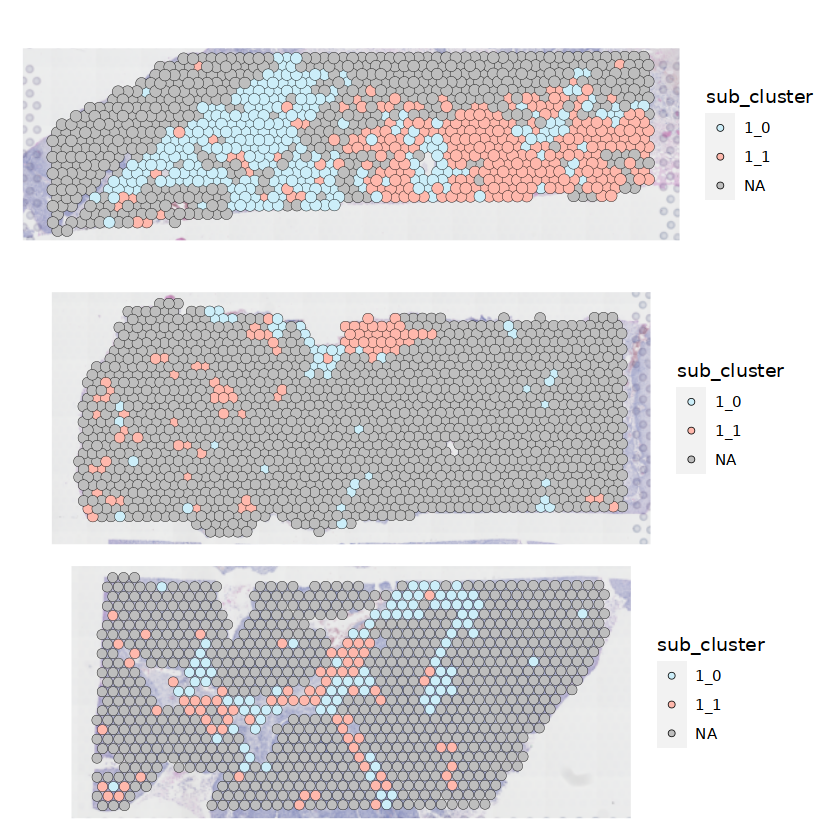

In [19]:
#array A
a <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1")  + theme(aspect.ratio = ratio_A11) + scale_fill_manual(values=palette)
b <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1.2")  + theme(aspect.ratio = ratio_A12) + scale_fill_manual(values=palette)
c <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1.1")  + theme(aspect.ratio = ratio_A13) + scale_fill_manual(values=palette)
a/b/c

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


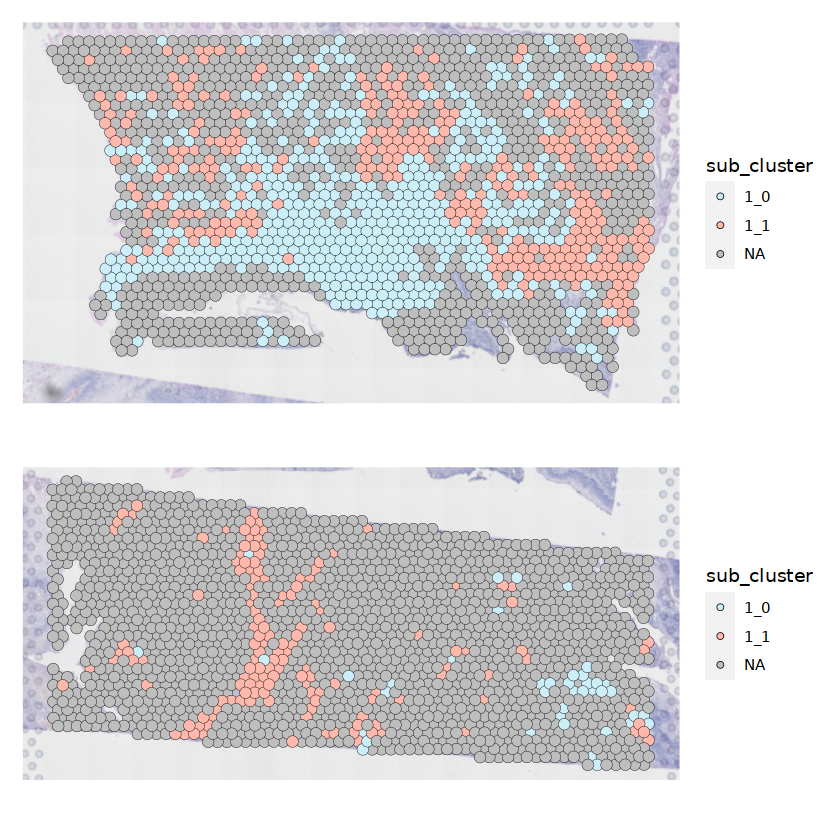

In [20]:
#array B
b1 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_B.3") + theme(aspect.ratio = ratio_B11) + scale_fill_manual(values=palette)
b2 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_B.4") + theme(aspect.ratio = ratio_B12) + scale_fill_manual(values=palette)
b1/b2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


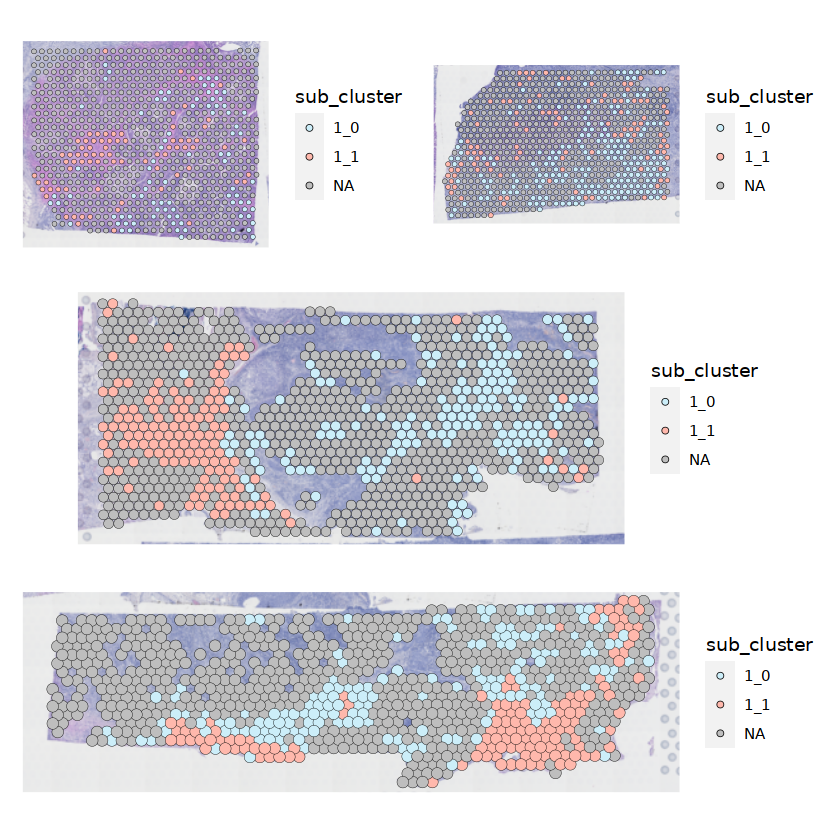

In [21]:
# array C
c1 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_C.5") + theme(aspect.ratio = ratio_C11) + scale_fill_manual(values=palette)
c2 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_C.7") + theme(aspect.ratio = ratio_C12) + scale_fill_manual(values=palette)
c3 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_C.8") + theme(aspect.ratio = ratio_C13) + scale_fill_manual(values=palette)
c4 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_C.6") + theme(aspect.ratio = ratio_C14) + scale_fill_manual(values=palette)
(c1 + c2)/c3/c4

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


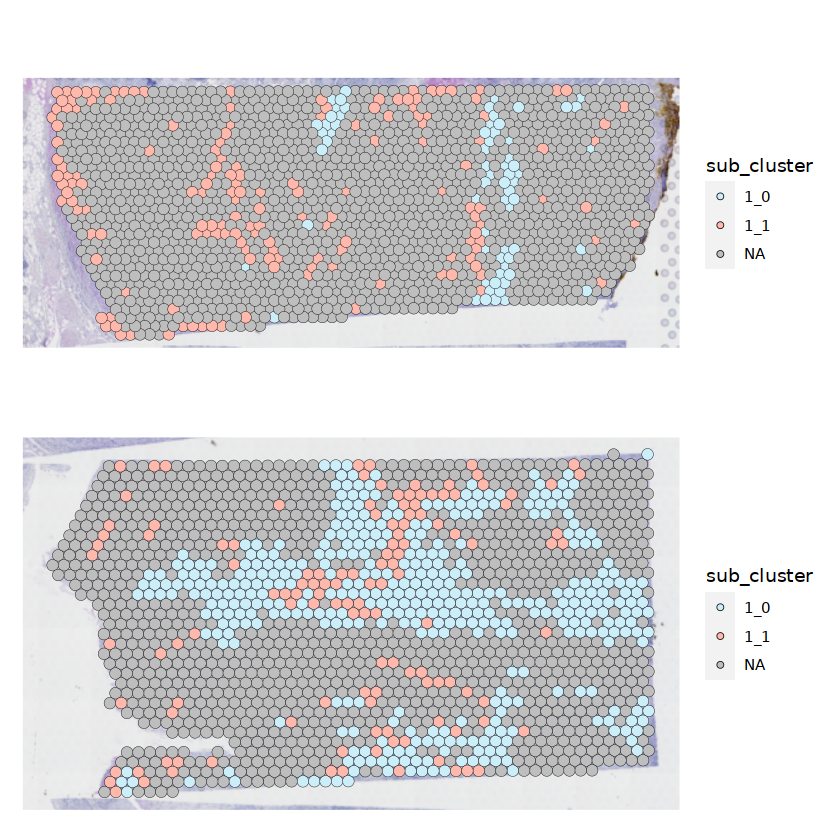

In [22]:
# array D
d1 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_D.9") + theme(aspect.ratio = ratio_D11) + scale_fill_manual(values=palette)
d2 <- SpatialDimPlot(all.integrated, group.by = "sub_cluster", images = "slice1_D.10") + theme(aspect.ratio = ratio_D12) + scale_fill_manual(values=palette)

d1/d2

In [24]:
##### FIND SUB CLUSTER ######
all.integrated2 <- all.integrated
Idents(all.integrated2) <- "seurat_clusters"
all.integrated2 <- FindSubCluster(all.integrated2, cluster = "1", graph.name = "integrated_nn", resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3739
Number of edges: 33162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8658
Number of communities: 12
Elapsed time: 0 seconds


8 singletons identified. 4 final clusters.



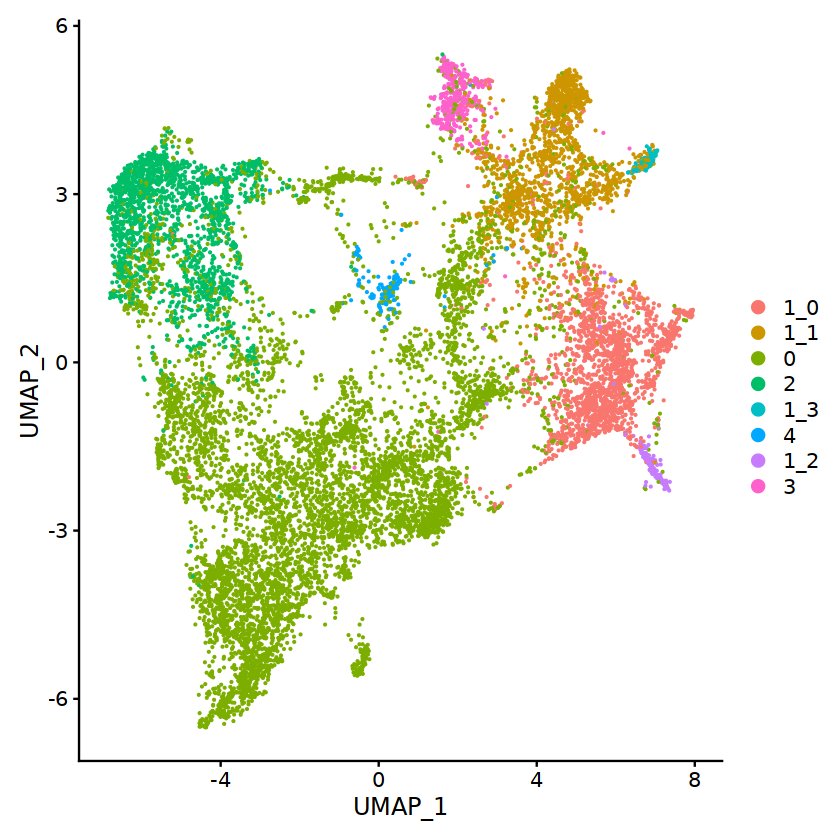

In [27]:
#with 4 subclusters res = 0.2
Idents(all.integrated2) <- "sub.cluster"
DimPlot(all.integrated2)

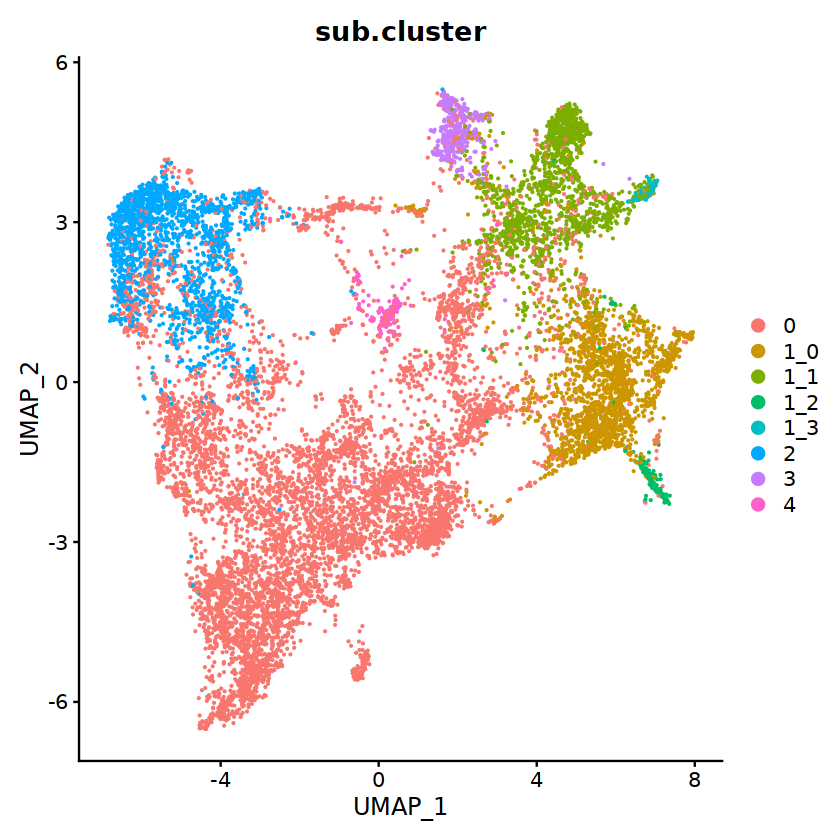

In [28]:
DimPlot(all.integrated2, group.by = "sub.cluster")

In [25]:
table(all.integrated2$sub.cluster)


   0  1_0  1_1  1_2  1_3    2    3    4 
7387 1867 1549  202  121 1906  412  167 

# Saving .RDS

In [30]:
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis/cluster_outs/"
saveRDS(all.integrated2, file = paste0(outdir, "50pca_all.integrated_by_tissue_subcluster1_res0.2.RDS"))

In [27]:
all.integrated2$sub_cluster <- all.integrated2$sub.cluster
head(all.integrated2)

orig.ident    nCount_Spatial nFeature_Spatial cell_type
A_AAACAATCTACTAGCA-1 SeuratProject  7155          3520             stroma   
A_AAACAGAGCGACTCCT-1 SeuratProject  2622          1529             stroma   
A_AAACCACTACACAGAT-1 SeuratProject  5383          2912             stroma   
A_AAACGAAGAACATACC-1 SeuratProject  6063          2758             stroma   
A_AAACGACAGTCTTGCC-1 SeuratProject  9441          4272             stroma   
A_AAACGCCCGAGATCGG-1 SeuratProject  3286          1929             stroma   
A_AAACGGGTTGGTATCC-1 SeuratProject 13908          4131             tumour   
A_AAACGTGTTCGCCCTA-1 SeuratProject  3565          2113             stroma   
A_AAACTAACGTGGCGAC-1 SeuratProject  3832          2162             stroma   
A_AAAGACATGAAGTTTA-1 SeuratProject 15592          4453             stroma   
                     recurrent tissues sample_id      p16_status tissue_site
A_AAACAATCTACTAGCA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACAGAGCGACTCCT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACCACTACACAGAT-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGAAGAACATACC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGACAGTCTTGCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGCCCGAGATCGG-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGGGTTGGTATCC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACGTGTTCGCCCTA-1 N         A1      P9900_no_event negative   oropharynx 
A_AAACTAACGTGGCGAC-1 N         A1      P9900_no_event negative   oropharynx 
A_AAAGACATGAAGTTTA-1 N         A1      P9900_no_event negative   oropharynx 
                     slide nCount_SCT nFeature_SCT integrated_snn_res.0.1
A_AAACAATCTACTAGCA-1 A     7413       3520         1                     
A_AAACAGAGCGACTCCT-1 A     6568       1971         1                     
A_AAACCACTACACAGAT-1 A     6997       2912         0                     
A_AAACGAAGAACATACC-1 A     7144       2758         0                     
A_AAACGACAGTCTTGCC-1 A     8835       4272         0                     
A_AAACGCCCGAGATCGG-1 A     6978       2127         1                     
A_AAACGGGTTGGTATCC-1 A     8884       3719         2                     
A_AAACGTGTTCGCCCTA-1 A     7126       2267         1                     
A_AAACTAACGTGGCGAC-1 A     7331       2259         0                     
A_AAAGACATGAAGTTTA-1 A     8762       3479         2                     
                     seurat_clusters sub.cluster sub_cluster
A_AAACAATCTACTAGCA-1 1               1_0         1_0        
A_AAACAGAGCGACTCCT-1 1               1_1         1_1        
A_AAACCACTACACAGAT-1 0               0           0          
A_AAACGAAGAACATACC-1 0               0           0          
A_AAACGACAGTCTTGCC-1 0               0           0          
A_AAACGCCCGAGATCGG-1 1               1_1         1_1        
A_AAACGGGTTGGTATCC-1 2               2           2          
A_AAACGTGTTCGCCCTA-1 1               1_3         1_3        
A_AAACTAACGTGGCGAC-1 0               0           0          
A_AAAGACATGAAGTTTA-1 2               2           2

# Plotting subclusters

In [28]:
#only want to see the subclusters of 0 - all others = NA
all.integrated2$sub_cluster[all.integrated2$sub_cluster == 0] <- "NA"
all.integrated2$sub_cluster[all.integrated2$sub_cluster == 2] <- "NA"
all.integrated2$sub_cluster[all.integrated2$sub_cluster == 3] <- "NA"
all.integrated2$sub_cluster[all.integrated2$sub_cluster == 4] <- "NA"
table(all.integrated2$sub_cluster)


 1_0  1_1  1_2  1_3   NA 
1867 1549  202  121 9872 

In [29]:
library("unikn")

Welcome to unikn (v0.7.0)!

shades_of() creates color gradients.



In [30]:
#new palette2
palette = c(`NA` = "grey",
            `1_0` = "#0AA398",
            `1_1` = "#71D1CC",
            `1_2` = "#ECA0B2",
            `1_3` = "#F3BFCB")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


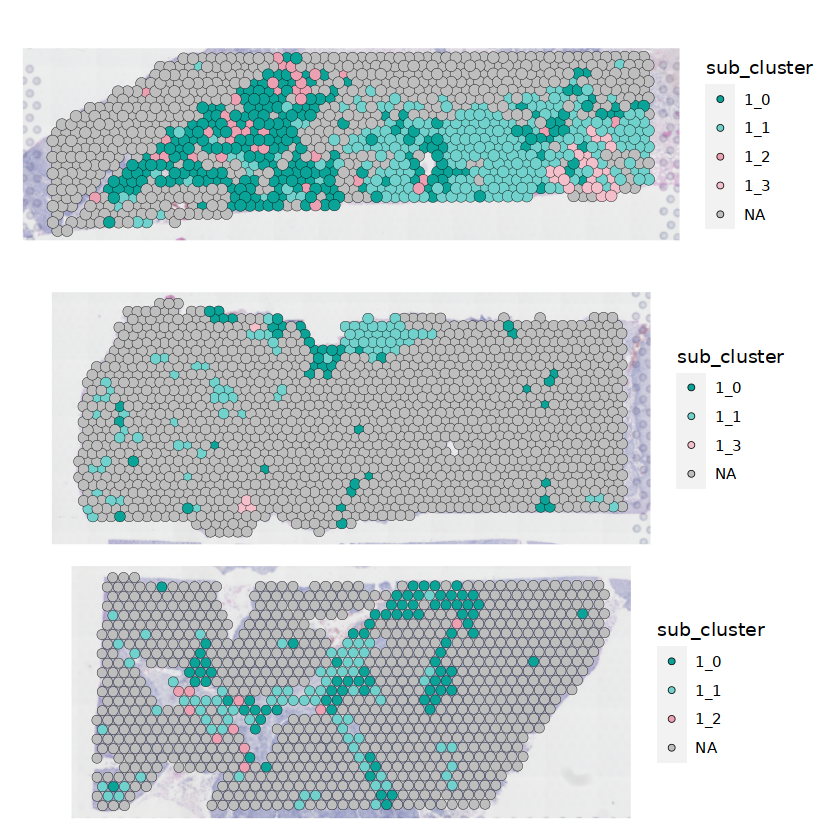

In [31]:
#array A
a <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1")  + theme(aspect.ratio = ratio_A11) + scale_fill_manual(values=palette)
b <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1.2")  + theme(aspect.ratio = ratio_A12) + scale_fill_manual(values=palette)
c <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1.1")  + theme(aspect.ratio = ratio_A13) + scale_fill_manual(values=palette)
a/b/c

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


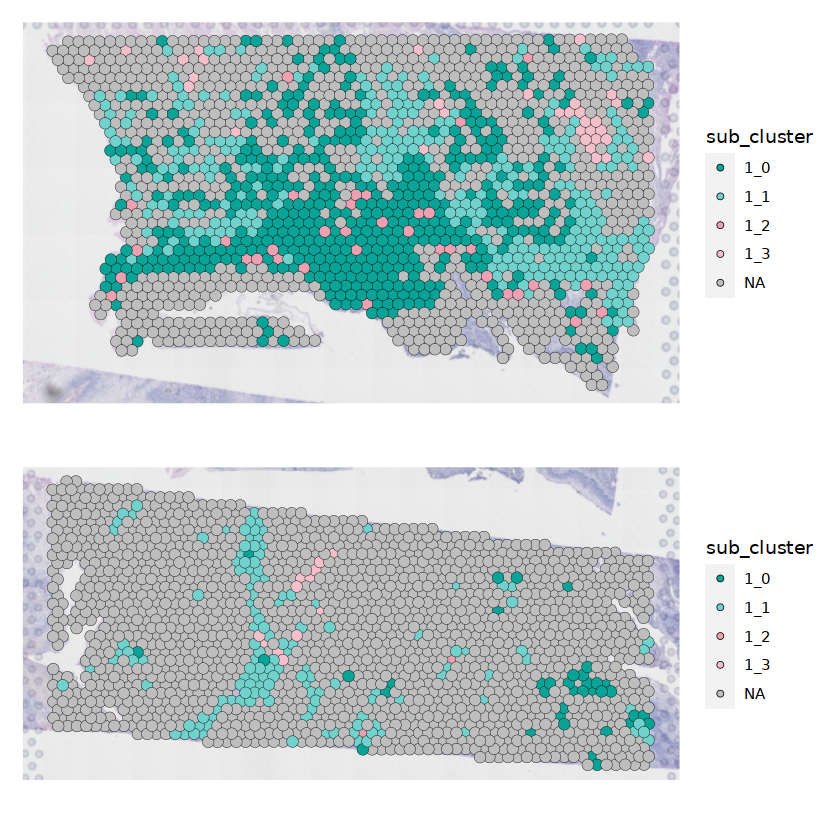

In [32]:
#array B
b1 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_B.3") + theme(aspect.ratio = ratio_B11) + scale_fill_manual(values=palette)
b2 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_B.4") + theme(aspect.ratio = ratio_B12) + scale_fill_manual(values=palette)
b1/b2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


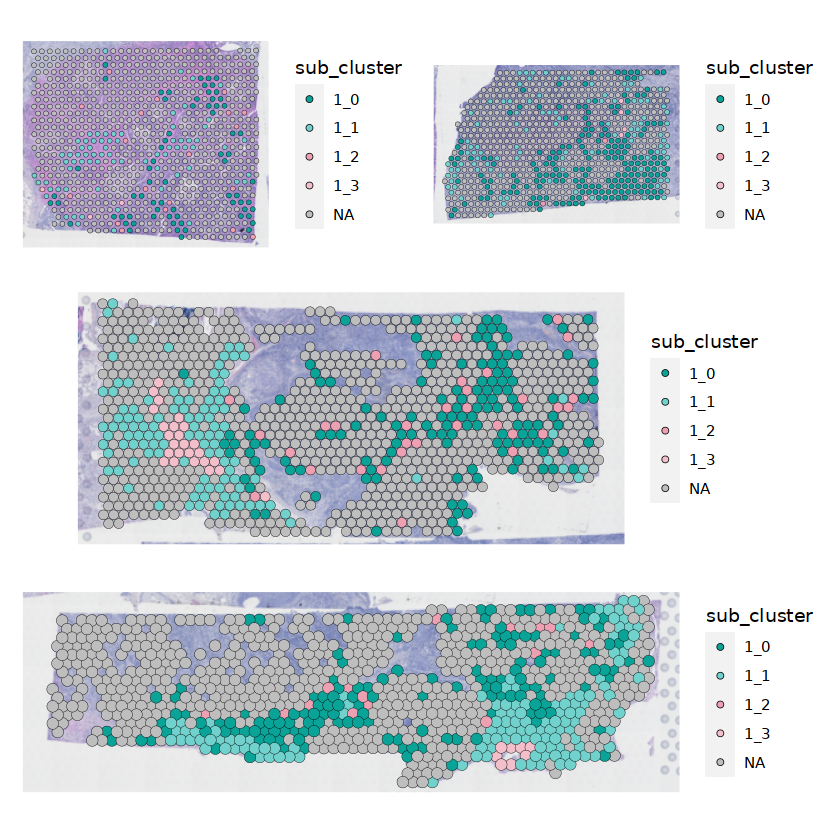

In [33]:
# array C
c1 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_C.5") + theme(aspect.ratio = ratio_C11) + scale_fill_manual(values=palette)
c2 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_C.7") + theme(aspect.ratio = ratio_C12) + scale_fill_manual(values=palette)
c3 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_C.8") + theme(aspect.ratio = ratio_C13) + scale_fill_manual(values=palette)
c4 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_C.6") + theme(aspect.ratio = ratio_C14) + scale_fill_manual(values=palette)
(c1 + c2)/c3/c4

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


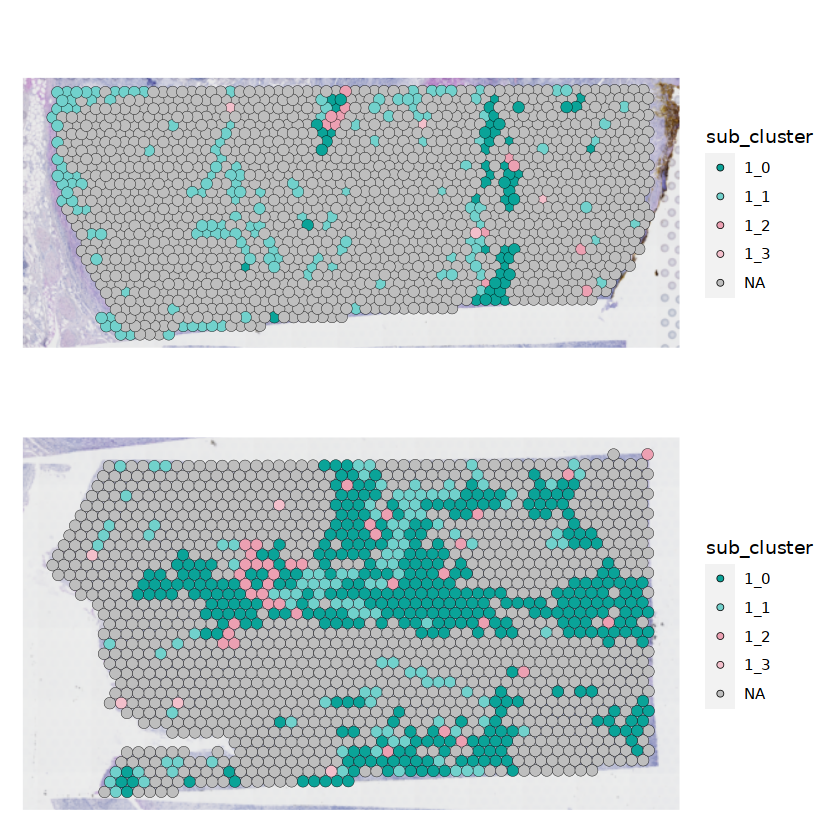

In [34]:
# array D
d1 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_D.9") + theme(aspect.ratio = ratio_D11) + scale_fill_manual(values=palette)
d2 <- SpatialDimPlot(all.integrated2, group.by = "sub_cluster", images = "slice1_D.10") + theme(aspect.ratio = ratio_D12) + scale_fill_manual(values=palette)

d1/d2